## Introduction

Solving the initial value problem $\begin{cases}
                                        x'(t) = -4x(t) + 1\\
                                        x(0) = 0.5
                                    \end{cases}
                                  $
by using the predictor-corrector scheme with the Adams-Bashford-Moulton method in conjunction with the Runge-Kutta method given by the tableau to generate the first several steps

The Runge-Kutta method is given by the following: <br />
$x(t+h) = x(t) + h(\frac{1}{6}K_1 + \frac{1}{3}K_2 + \frac{1}{3}K_3 + \frac{1}{6}K_4)$<br />
$K_1 = f(t, x)$<br />
$K_2 = f(t + \frac{1}{2}h, x + \frac{h}{2}K_1)$<br />
$K_3 = f(t + \frac{1}{2}h, x + \frac{h}{2}K_2)$<br />
$K_4 = f(t + h, x + hK_3)$
<br />
The Adams-Bashford-Moulton method is given by the following: <br />
Predictor: $\tilde{x_n} = x_{n-1} + \frac{h}{24}[55f(t_{n-1},x_{n-1}) - 59f(t_{n-2},x_{n-2}) + 37f(t_{n-3},x_{n-3}) - 9f(t_{n-4},x_{n-4})]$<br />
Corrector: $x_n = x_{n-1} + \frac{h}{24}[9f(t_n,\tilde{x_n}) + 19f(t_{n-1},x_{n-1}) - 5f(t_{n-2},x_{n-2}) + f(t_{n-3},x_{n-3})]$

Use step sizes $h= 0.5, 0.1, 0.01, 0.001$

In [98]:
import numpy as np
#Since we are plotting the various step_sizes, return array with values

def f(x): #given x'(t)
    return ((-4*x)+1)

def ODE(lower_lim, upper_lim, h):
    a = lower_lim
    b = upper_lim
    n = int((b - a)/h)
    t = np.linspace(a, b, n+1)
    x = [0 for i in range(n+1)]
    #initial value
    x[0] = 0.5
    for i in range(1, n+1):
        if i < 6:
            #Runge Kutta method for i = 1-5
            K_1 = f(x[i-1])
            K_2 = f(x[i-1]+(h*K_1)/2)
            K_3 = f(x[i-1]+(h*K_2)/2)
            K_4 = f(x[i-1]+h*K_3)
            x[i] = x[i-1]+h*((K_1/6)+(K_2/3)+(K_3/3)+(K_4/6))
        else:
            #Predictor-Corrector scheme with Adams-Bashford-Moulton method
            x_temp = x[i-1]+(h/24)*(f(x[i-1])-59*f(x[i-2])+37*f(x[i-3])-9*f(x[i-4]))
            x[i] = x[i-1]+(h/24)*(9*f(x_temp)+19*f(x[i-1])-5*f(x[i-2])+f(x[i-3]))
    x = np.array(x)
    return (x,t)

x_1 = ODE(0,5,0.5)
x_2 = ODE(0,5,0.1)
x_3 = ODE(0,5,0.01)
x_4 = ODE(0,5,0.001)
# printing x(5) from h = 0.001
# most accurate result
print(x_4[0][-1])

0.25000000048157284


Plotting numerical solutions and exact solution on $0\leq t \leq 5$

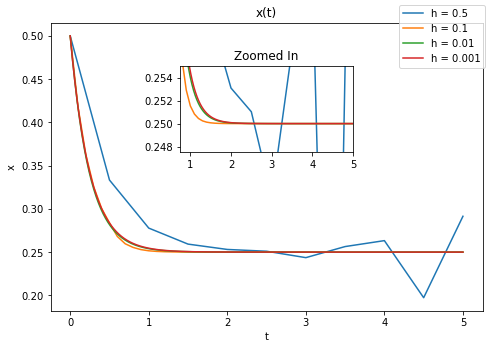

In [96]:
import pandas as pd 
from matplotlib import pyplot as plt
df_1 = pd.DataFrame({'t':x_1[1], 'x':x_1[0]})
df_2 = pd.DataFrame({'t':x_2[1], 'x':x_2[0]})
df_3 = pd.DataFrame({'t':x_3[1], 'x':x_3[0]})
df_4 = pd.DataFrame({'t':x_4[1], 'x':x_4[0]})

fig = plt.figure()
axes1 = fig.add_axes([0.1,0.1,1,1])
axes2 = fig.add_axes([0.4,0.65,0.4,0.3])

i = 1
for frame in [df_1,df_2,df_3,df_4]:
    axes1.plot(frame['t'], frame['x'], label="x_"+str(i))
    axes2.plot(frame['t'], frame['x'])
    i += 1
axes1.set_xlabel("t")
axes1.set_ylabel('x')
axes1.set_title('x(t)')
axes2.set_title('Zoomed In')
axes2.set_ylim([0.2475,0.255])
axes2.set_xlim([0.75,5])
fig.legend(labels=('h = 0.5','h = 0.1','h = 0.01','h = 0.001'))

### Results

As we can see, step size $h=0.5$ yields the greatest error compared to the other step sizes. $h=0.1$ and $h=0.01$ are optimal since they are extremely close to the actual value @ $t=5$, yet they require much less computation compared to $h=0.001$. $h=0.1$ is inaccurate around $t=1$, however, since x(t) is stable (given by $x(t)=\frac{1}{4}e^{-4t} + \frac{1}{4}$) the solutions converge as $t\rightarrow 5$ and the larger step size $h$ still yields an accurate result. <br /><br />
From our predictor-corrector scheme with the Runge-Kutta and Adams-Bashford-Moulton methods: $x(5)\approx 0.25000000048157284$